# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [64]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [65]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)
library(rjson)

In [66]:
feat_df <- read.table("../../../output/annotations_MS1_MS2/PS_selected_full_report.csv"
        ,header = TRUE, sep = ',')
annot_evidence = "LMSD" # MS2, LMSD, isotopes
filtered_level = 0.05

In [67]:
out_dir = glue("../../../output/heatmap_{annot_evidence}/")
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

In [68]:
colnames(feat_df)

[1] "X"                        "mz"                      
 [3] "rtime"                    "rtime_left_base"         
 [5] "rtime_right_base"         "cSelectivity"            
 [7] "goodness_fitting"         "snr"                     
 [9] "annotation_evidence"      "name"                    
[11] "neutral_mass"             "formula"                 
[13] "isomers"                  "X.M.H.e."                
[15] "gMean_Tn"                 "gMean_CD8stem"           
[17] "gMean_CD8trans"           "gMean_CD8TD"             
[19] "log2FC_CD8stemvsTn"       "log2FC_CD8transvsTn"     
[21] "log2FC_CD8TDvsTn"         "log2FC_CD8transvsCD8stem"
[23] "log2FC_CD8TDvsCD8stem"    "log2FC_CD8TDvsCD8trans"  
[25] "f_score"                  "pval"                    
[27] "padj"                     "Tpadj_CD8TD.CD8stem"     
[29] "Tpadj_CD8trans.CD8stem"   "Tpadj_Tn.CD8stem"        
[31] "Tpadj_CD8trans.CD8TD"     "Tpadj_Tn.CD8TD"          
[33] "Tpadj_Tn.CD8trans"        "TFDR_CD8TD.CD8stem"      
[35] "TFDR_CD8trans.CD8stem"    "TFDR_Tn.CD8stem"         
[37] "TFDR_CD8trans.CD8TD"      "TFDR_Tn.CD8TD"           
[39] "TFDR_Tn.CD8trans"         "CD8TD_750K_1"            
[41] "CD8TD_750K_2"             "CD8stem_250K_1"          
[43] "CD8stem_300K_2"           "CD8trans_250K_2"         
[45] "CD8trans_350K_1"          "Tn_250K_1"               
[47] "Tn_250K_2"                "pooled_1"                
[49] "pooled_2"                 "pooled_3"

In [69]:
feat_df = feat_df[grepl(annot_evidence,feat_df[['annotation_evidence']]),]

In [70]:
head(feat_df)

,X,mz,rtime,rtime_left_base,rtime_right_base,cSelectivity,goodness_fitting,snr,annotation_evidence,name,neutral_mass,formula,isomers,X.M.H.e.,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,F1262,498.2843,33.72,32.23,36.32,1.00,0.94,261,in-silico|LMSD,LPS O-16:0;O,499.2910,C22H46NO9P,,498.2837,19.98088,20.45486,20.16673,17.90540,0.473977259,0.18584762,-2.0754786,-0.28812964,-2.5494558,-2.2613262,21.1233039,0.006477507,0.07755828,0.0071075248,0.8499252,0.5967650,0.0110374094,0.0150319504,0.9502001,0.13643130,1,1,0.18484301,0.14996957,1,17.90540,17.90540,20.94079,19.96893,20.14655,20.18691,20.12268,19.83908,20.47647,20.59828,20.43407
19,F1263,498.2843,130.03,127.41,132.54,1.00,0.94,34,in-silico|LMSD,LPS O-16:0;O,499.2910,C22H46NO9P,,498.2837,19.96034,20.09441,19.88651,16.28507,0.134068113,-0.07383516,-3.6752727,-0.20790328,-3.8093408,-3.6014375,83.5833697,0.000459840,0.02342012,0.0006415903,0.8820273,0.9622003,0.0008006683,0.0007391028,0.9930542,0.04901529,1,1,0.05812784,0.04145525,1,16.28507,16.28507,20.42631,19.76250,19.99752,19.77549,20.16343,19.75725,20.34149,20.28829,20.18420
20,F1264,498.2843,150.25,147.50,153.00,0.76,0.87,16,in-silico|LMSD,LPS O-16:0;O,499.2910,C22H46NO9P,,498.2837,18.37491,18.55495,18.42071,15.88749,0.180041456,0.04579571,-2.4874176,-0.13424575,-2.6674591,-2.5332133,23.9445606,0.005124064,0.07026589,0.0068427285,0.9816117,0.9584056,0.0082818939,0.0088564007,0.9992140,0.13488925,1,1,0.16295562,0.11802319,1,15.88749,15.88749,19.02242,18.08749,18.51240,18.32902,18.59473,18.15509,18.81997,18.94943,18.76193
55,F4224,482.2890,207.04,204.92,209.41,0.88,0.88,430,in-silico|LMSD,LPS O-16:0,483.2961,C22H46NO8P,,482.2888,18.55231,18.89654,19.27160,16.96978,0.344235025,0.71929509,-1.5825278,0.37506006,-1.9267628,-2.3018229,2.1836834,0.232545342,0.44692889,0.3252585163,0.9777344,0.9825295,0.2237992547,0.4548500466,0.8756701,0.74597334,1,1,0.69933321,0.83710002,1,18.01166,15.92791,18.89428,18.89881,19.63266,18.91054,17.73964,19.36498,18.22254,17.45493,18.58218
56,F4225,482.2890,217.67,215.07,220.28,1.00,0.98,3652,in-silico|isotopes|LMSD,LPS O-16:0,483.2961,C22H46NO8P,,482.2888,21.89478,21.89980,21.88164,21.63916,0.005020197,-0.01313396,-0.2556191,-0.01815415,-0.2606393,-0.2424851,0.5043478,0.699746089,0.77436936,0.7421544982,0.9998433,0.9999967,0.7775732947,0.7520389140,0.9999406,1.00000000,1,1,1.00000000,1.00000000,1,21.70920,21.56912,22.12183,21.67776,22.07978,21.68351,22.07871,21.71085,22.32969,22.42693,22.40427
57,F4375,572.2993,217.23,214.63,219.84,1.00,0.95,1815,in-silico|LMSD,LPS 22:4,573.3067,C28H48NO9P,PS O-22:4|LPS O-22:5;O,572.2994,20.92900,21.18376,20.75623,19.84728,0.254756392,-0.17277560,-1.0817280,-0.42753199,-1.3364844,-0.9089524,0.7413195,0.580496922,0.69915245,0.5601527430,0.9666868,0.9923591,0.7823088906,0.6923378043,0.9975568,0.96954563,1,1,1.00000000,1.00000000,1,18.59876,21.09579,21.63825,20.72928,20.94784,20.56462,21.08245,20.77556,21.12070,21.09568,21.37852


In [71]:
feat_df = feat_df[!duplicated(feat_df$X),]

In [72]:
dim(feat_df)

[1] 86 50

In [73]:
library(dplyr)

feat_df = feat_df %>%
  mutate(surrogate = paste(name, round(rtime,2), sep = "_"))

rownames(feat_df) = feat_df$surrogate

In [74]:
rownames(feat_df)[1:5]

[1] "LPS O-16:0;O_33.72"  "LPS O-16:0;O_130.03" "LPS O-16:0;O_150.25"
[4] "LPS O-16:0_207.04"   "LPS O-16:0_217.67"

In [75]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [76]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [77]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [78]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [79]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Filter data

In [80]:
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [81]:
dim(feat_df.filt)

[1] 36 51

## subset datatable with only data values

In [82]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [83]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [84]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.874265  2.071359

#### columns and rows annotation

In [85]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [86]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [87]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [88]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [89]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [90]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [91]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [92]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [93]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [94]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [95]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [96]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [97]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.874265  2.071359

In [98]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [99]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.874265  2.100000

In [100]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [101]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [102]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

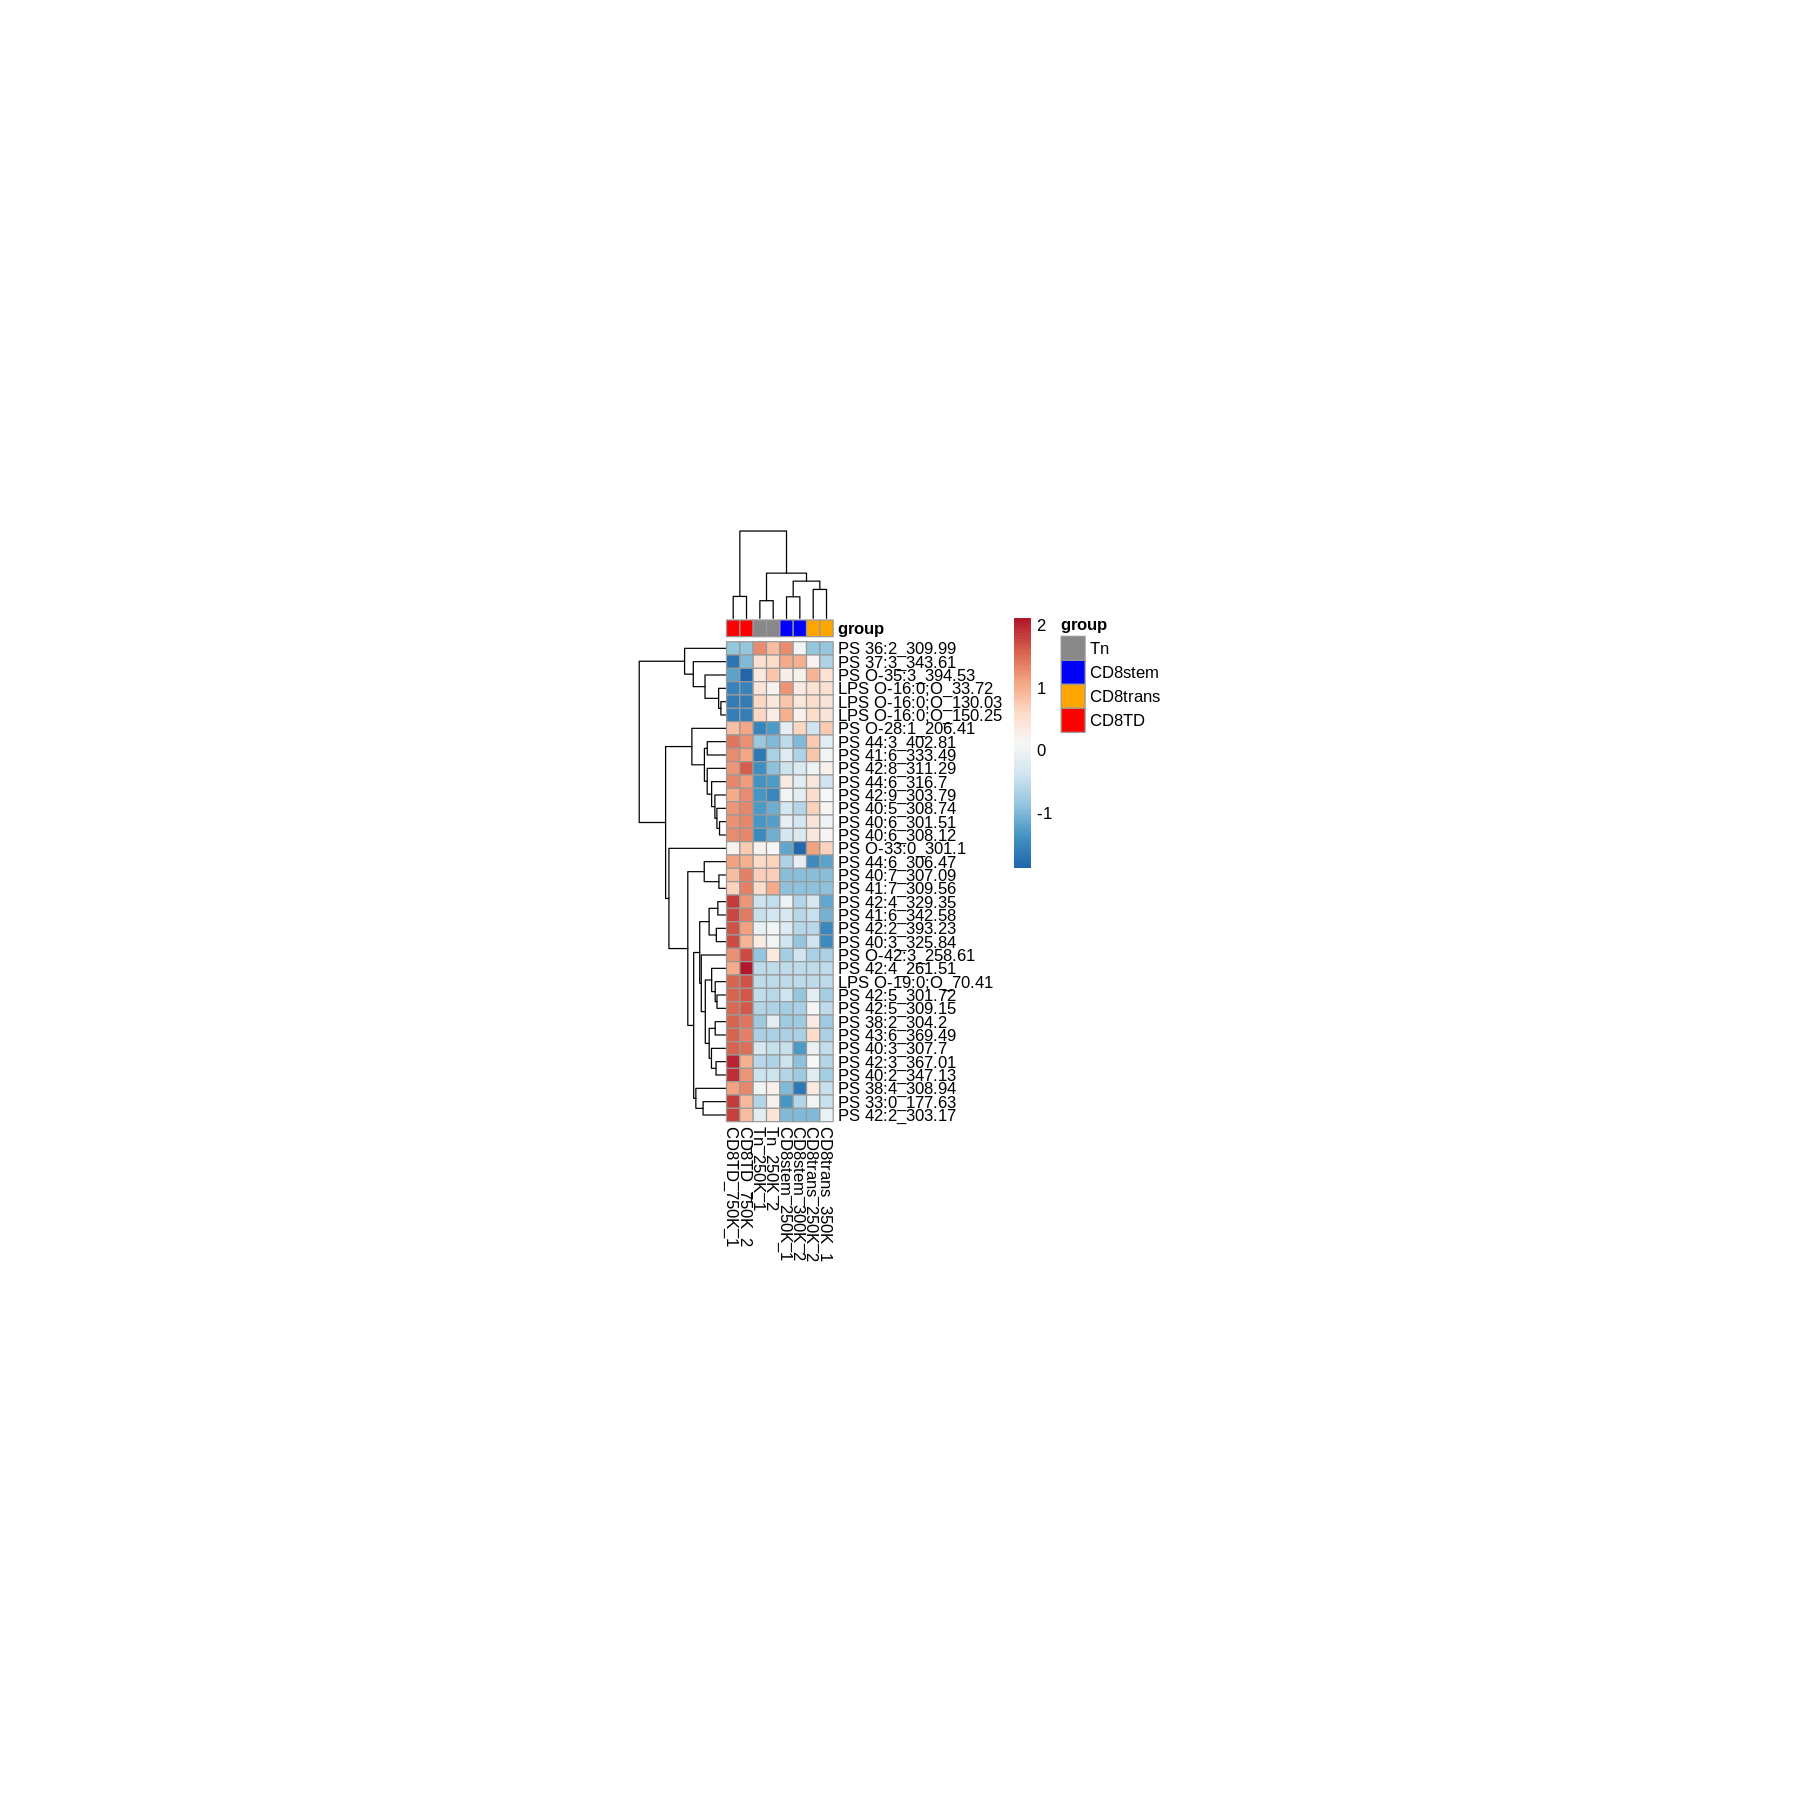

In [103]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----